Meshgrid  & mgrid 
-----------------

x - jest najszybciej zmieniajacym się wskażnikiem (row-major) więc indeskowanie trzeba "odwrócic" względem kolejności argumentów w funkcji f:
$$x,y \to j,i$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
nx = 11
ny = 5
x1,y1 = 1,2

X,Y = np.meshgrid(np.linspace(0,x1,nx),np.linspace(0,y1,ny))
X.shape

(5, 11)

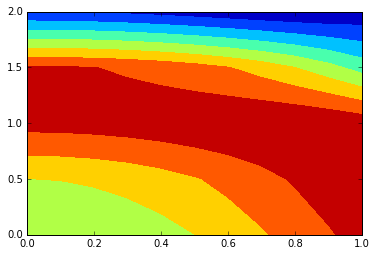

In [2]:
f = lambda X_,Y_:np.sin(X_**2+Y_**2)
Z = f(X,Y)

plt.contourf(X,Y,Z)
# To samo co:
# plt.contourf(X.T,Y.T,Z.T)

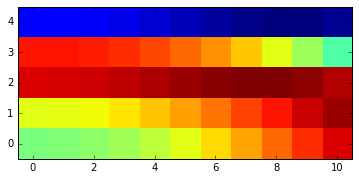

In [3]:
plt.imshow(Z,interpolation='nearest',origin='lower')

In [4]:
X

array([[ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]])

In [5]:
Y

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5],
       [ 2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ]])

Porównanie z próbkowaniem "ręcznym":

In [6]:
i,j = 2,3
print ("dla x i y", X[i,j],Y[i,j],"jest", Z[i,j],f(X[i,j],Y[i,j]),\
      "powinno byc rowne", f(x1/float(nx-1)*i,y1/float(ny-1)*j) )

dla x i y 0.3 1.0 jest 0.886626914449 0.886626914449 powinno byc rowne 0.752330576394


Dobrze:

In [8]:
i,j = 2,3
print ("dla x i y" ,X[j,i],Y[j,i],"jest", Z[j,i],f(X[j,i],Y[j,i]),\
    "powinno byc rowne", f(x1/float(nx-1)*i,y1/float(ny-1)*j))

dla x i y 0.2 1.5 jest 0.752330576394 0.752330576394 powinno byc rowne 0.752330576394


Z jest row major więc można też napisać:


In [14]:
print Z[j,i],Z.flatten()[j*nx+i]

0.752330576394 0.752330576394


### mgrid

mgrid zachowuje się odwrotnie

    X,Y = np.meshgrid(np.arange(0,nx),np.arange(0,ny))
    Yn, Xn = np.mgrid[0:ny,0:nx]


In [15]:
Yn, Xn = np.mgrid[0:ny,0:nx]
Xn.shape

(5, 11)

In [16]:
Xn

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [17]:
Yn

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [18]:
Xn/(float(nx-1)*x1)

array([[ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]])

In [19]:
X1,Y1 = Xn*(x1/float(nx-1)),Yn*(y1/float(ny-1))

In [20]:
np.allclose(X, X1),np.allclose(Y, Y1),np.allclose(Y, Y1)

(True, True, True)

Zresztą sprawdzmy:

In [21]:
Z.strides

(88, 8)

In [22]:
np.meshgrid(np.arange(nx),np.arange(ny))

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])]

In [23]:
list(reversed(np.mgrid[0:ny,0:nx]))

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])]

In [24]:
np.meshgrid(np.arange(ny),np.arange(nx),indexing='ij')

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])]

In [25]:
np.mgrid[0:ny,0:nx]

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4]],

       [[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]])